## Momentum Intro

In [1]:
import torch
from torch import nn, optim
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
torch.manual_seed(0)

In [31]:
def train_and_plot(model, optimizer, plot_dim, std=0):
    Loss = []
    W = torch.arange(-4, 6, 0.1)
    for model.state_dict()['linear.weight'][0] in W:
        if plot_dim == 3:
            Loss.append(cubic(model(torch.tensor([[1.0]]))).item()) # cubic() and fourth_order() will be declared later
        elif plot_dim == 4:
            Loss.append(fourth_order(model(torch.tensor([[1.0]]))).item())
    model.state_dict()['linear.weight'][0] = 4.0 if plot_dim == 3 else 6.0
    parameter = []
    epoch_loss = []
    
    for epoch in range(10):
        optimizer.zero_grad()
        if plot_dim == 3:
            loss = cubic(model(torch.tensor([[1.0]])))
        elif plot_dim == 4:
            loss = fourth_order(model(torch.tensor([[1.0]]))) + std * torch.randn(1, 1)
        epoch_loss.append(loss)
        parameter.append(model.state_dict()['linear.weight'][0].detach().data.item())
        loss.backward()
        optimizer.step()
    
    plt.plot(parameter, epoch_loss, 'ro', label='Parameter Values')
    plt.plot(W.numpy(), Loss, label='Objective Function', color='b')
    plt.xlabel('weight')
    plt.ylabel('Loss')
    plt.legend()

In [23]:
class Net(nn.Module):
    def __init__(self, input_size, output_size):
        super(Net, self).__init__()
        self.linear = nn.Linear(input_size, output_size, bias=False)
        
    def forward(self, x):
        return self.linear(x)

In [24]:
def cubic(y_hat):
    return y_hat ** 3

def fourth_order(y_hat):
    out = torch.mean(2 * (y_hat ** 4) - 9 * (y_hat ** 3) - 21 * (y_hat ** 2) + 88 * y_hat + 48)
    return out

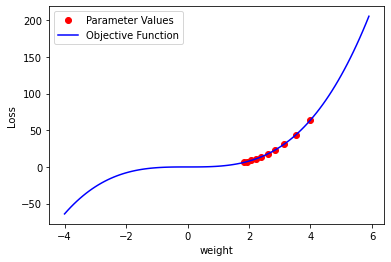

In [25]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0)
train_and_plot(model, optimizer, 3)

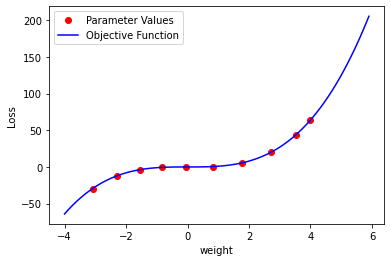

In [26]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
train_and_plot(model, optimizer, 3)

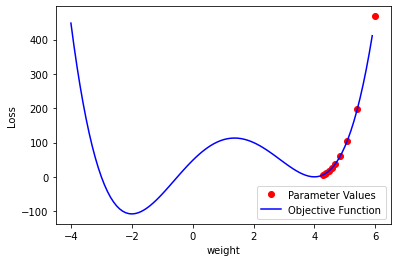

In [27]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
train_and_plot(model, optimizer, 4)

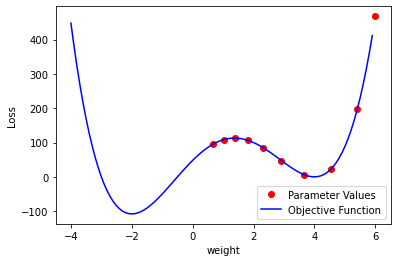

In [28]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train_and_plot(model, optimizer, 4)

## Testing with Noise

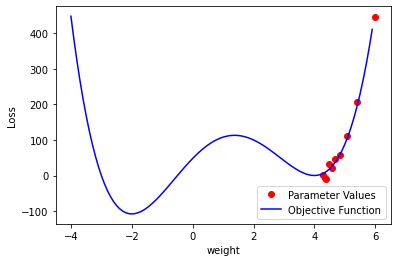

In [32]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
train_and_plot(model, optimizer, 4, std=10)

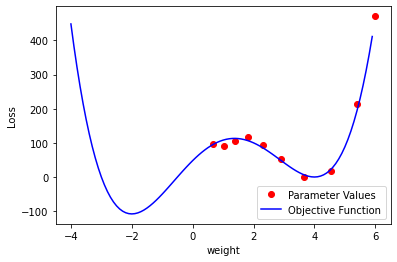

In [33]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train_and_plot(model, optimizer, 4, std=10)

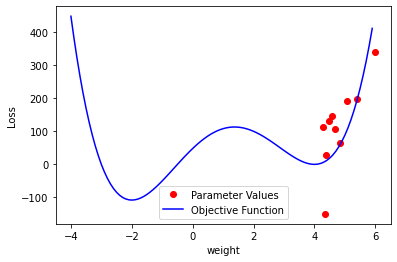

In [34]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0)
train_and_plot(model, optimizer, 4, std=100)

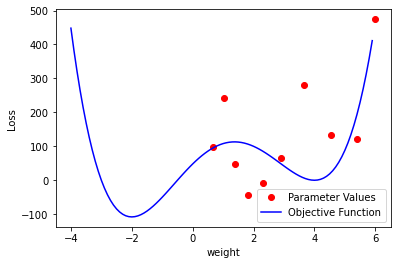

In [35]:
model = Net(1, 1)
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)
train_and_plot(model, optimizer, 4, std=100)